In [24]:
from scipy import *
from numpy import *
from matplotlib import *
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
#from nsepy import get_history
from tabulate import tabulate
import cvxpy as cp
import sys
import yfinance as yf
##
import stock
import optimization
import riskmanagement
##
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import EfficientSemivariance
from pypfopt import EfficientCVaR
from pypfopt import CLA
from pypfopt import HRPOpt
from pypfopt import DiscreteAllocation
##
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [26]:
tickers = ["TATASTEEL.NS","JINDALSTEL.NS","COALINDIA.NS", "JSWSTEEL.NS","ZYDUSLIFE.NS", "MINDAIND.NS", "JBMA.NS",
           "SUNTV.NS","IOLCP.NS","SAKSOFT.NS","SHAKTIPUMP.NS","CUMMINSIND.NS","CYIENT.NS",
          "TVSMOTOR.NS","IEX.NS","BEL.NS"]

ohlc = yf.download(tickers, start="2018-01-01", end="2022-06-29")
#ohlc = yf.download(tickers, period="max")
prices = ohlc["Close"]
#prices = prices.fillna(0)
prices.tail(4)

[*********************100%***********************]  16 of 16 completed


,BEL.NS,COALINDIA.NS,CUMMINSIND.NS,CYIENT.NS,IEX.NS,IOLCP.NS,JBMA.NS,JINDALSTEL.NS,JSWSTEEL.NS,MINDAIND.NS,SAKSOFT.NS,SHAKTIPUMP.NS,SUNTV.NS,TATASTEEL.NS,TVSMOTOR.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,
2022-06-23,226.899994,177.149994,985.549988,793.000000,171.000000,322.100006,403.600006,309.850006,558.950012,886.849976,790.599976,482.100006,412.899994,841.299988,772.000000,346.399994
2022-06-24,233.500000,176.550003,996.549988,781.200012,174.100006,330.850006,423.750000,317.600006,567.799988,917.000000,792.549988,504.950012,414.950012,852.849976,798.750000,353.350006
2022-06-27,240.050003,182.050003,1007.349976,792.000000,174.899994,331.600006,421.700012,322.500000,571.650024,937.599976,807.500000,512.099976,414.899994,867.849976,801.500000,353.899994
2022-06-28,236.449997,186.399994,1001.150024,775.700012,167.149994,334.799988,433.149994,333.049988,578.400024,928.599976,807.150024,515.650024,418.250000,878.900024,820.200012,357.750000


In [2]:
tickers = ["ADANIPORTS.NS","JAMNAAUTO.NS", "SAKSOFT.NS", "SCHAEFFLER.NS",
              "ADANIPOWER.NS", "MINDACORP.NS", "TATAPOWER.NS","IEX.NS",
           "GENESYS.NS","GOLDIAM.NS",  "MINDAIND.NS",
          "TATASTEEL.NS","TATAELXSI.NS","SUPPETRO.NS", "HCLTECH.NS"]

#ohlc = yf.download(tickers, start="2020-01-01", end="2022-02-21")
ohlc = yf.download(tickers, period="max")
prices = ohlc["Close"]
#prices = prices.fillna(0)
prices.tail(4)

[*********************100%***********************]  15 of 15 completed


,ADANIPORTS.NS,ADANIPOWER.NS,GENESYS.NS,GOLDIAM.NS,HCLTECH.NS,IEX.NS,JAMNAAUTO.NS,MINDACORP.NS,MINDAIND.NS,SAKSOFT.NS,SCHAEFFLER.NS,SUPPETRO.NS,TATAELXSI.NS,TATAPOWER.NS,TATASTEEL.NS
Date,,,,,,,,,,,,,,,
2022-02-18,727.500000,131.600006,419.350006,821.900024,1165.000000,217.550003,102.949997,194.899994,974.000000,915.000000,1844.349976,660.000000,6985.500000,225.750000,1190.800049
2022-02-21,711.099976,120.150002,440.299988,786.200012,1164.750000,210.199997,98.650002,191.500000,935.400024,894.549988,1867.150024,644.299988,6733.000000,225.000000,1181.849976
2022-02-22,705.549988,120.550003,462.299988,758.299988,1149.550049,205.250000,97.349998,194.899994,967.049988,862.250000,1819.800049,677.400024,6560.850098,222.649994,1138.699951
2022-02-23,714.849976,128.250000,485.399994,782.250000,1153.099976,208.699997,98.900002,197.250000,962.099976,878.349976,1845.000000,666.700012,6671.850098,224.600006,1142.000000


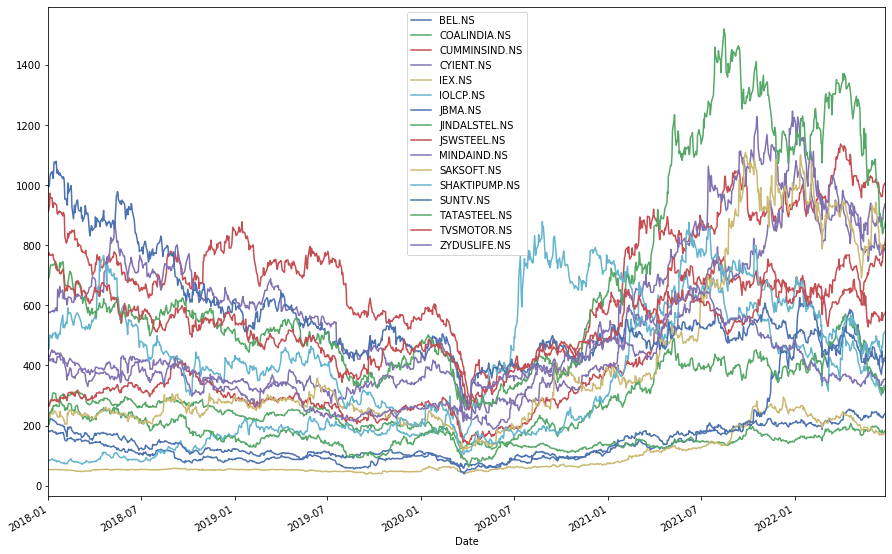

In [27]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [28]:
rets = expected_returns.returns_from_prices(prices)
#rets.tail()
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('BEL.NS', 0.05591),
             ('COALINDIA.NS', 0.08677),
             ('CUMMINSIND.NS', 0.10899),
             ('CYIENT.NS', 0.08922),
             ('IEX.NS', 0.09618),
             ('IOLCP.NS', 0.04588),
             ('JBMA.NS', 0.04271),
             ('JINDALSTEL.NS', 0.01911),
             ('JSWSTEEL.NS', 0.04621),
             ('MINDAIND.NS', 0.06374),
             ('SAKSOFT.NS', 0.0457),
             ('SHAKTIPUMP.NS', 0.04426),
             ('SUNTV.NS', 0.04875),
             ('TATASTEEL.NS', 0.03525),
             ('TVSMOTOR.NS', 0.07821),
             ('ZYDUSLIFE.NS', 0.0931)])

In [29]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 16.2%
Annual volatility: 22.1%
Sharpe Ratio: 0.64


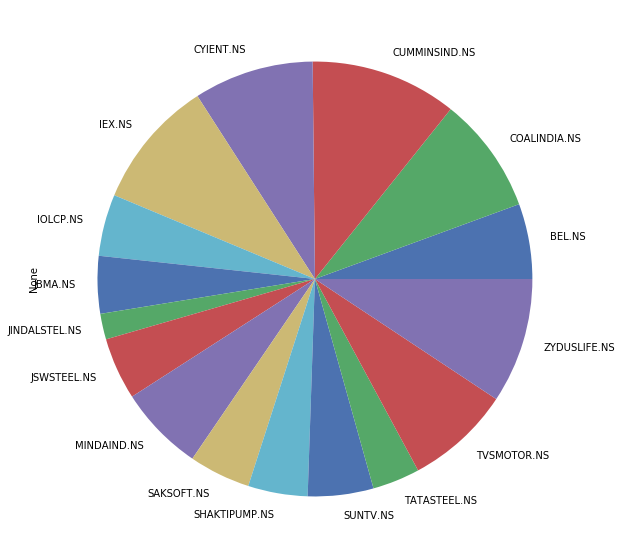

In [30]:
fig1 = pd.Series(weights).plot.pie(figsize=(10, 10));

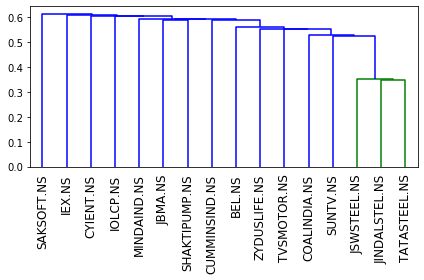

In [31]:
plotting.plot_dendrogram(hrp); 

In [32]:
dfn = prices.fillna(0)
latest_prices = dfn.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with \u20B9 {leftover:.2f} leftover")
alloc

Discrete allocation performed with ₹ 68.30 leftover


{'BEL.NS': 23,
 'COALINDIA.NS': 46,
 'CUMMINSIND.NS': 11,
 'CYIENT.NS': 11,
 'IEX.NS': 57,
 'IOLCP.NS': 14,
 'JBMA.NS': 10,
 'JINDALSTEL.NS': 6,
 'JSWSTEEL.NS': 8,
 'MINDAIND.NS': 7,
 'SAKSOFT.NS': 6,
 'SHAKTIPUMP.NS': 9,
 'SUNTV.NS': 12,
 'TATASTEEL.NS': 4,
 'TVSMOTOR.NS': 9,
 'ZYDUSLIFE.NS': 26}

In [33]:
ohlc1 = yf.download(tickers, start="2018-01-01", end="2022-06-29")
#ohlc = yf.download(tickers, period="max")
prices1 = ohlc1["Close"]
prices1.to_csv("prices.csv")
df = pd.read_csv("prices.csv") 
df = df.fillna(0)
df.tail(3)

[*********************100%***********************]  16 of 16 completed


,Date,BEL.NS,COALINDIA.NS,CUMMINSIND.NS,CYIENT.NS,IEX.NS,IOLCP.NS,JBMA.NS,JINDALSTEL.NS,JSWSTEEL.NS,MINDAIND.NS,SAKSOFT.NS,SHAKTIPUMP.NS,SUNTV.NS,TATASTEEL.NS,TVSMOTOR.NS,ZYDUSLIFE.NS
1106,2022-06-24,233.500000,176.550003,996.549988,781.200012,174.100006,330.850006,423.750000,317.600006,567.799988,917.000000,792.549988,504.950012,414.950012,852.849976,798.750000,353.350006
1107,2022-06-27,240.050003,182.050003,1007.349976,792.000000,174.899994,331.600006,421.700012,322.500000,571.650024,937.599976,807.500000,512.099976,414.899994,867.849976,801.500000,353.899994
1108,2022-06-28,236.449997,186.399994,1001.150024,775.700012,167.149994,334.799988,433.149994,333.049988,578.400024,928.599976,807.150024,515.650024,418.250000,878.900024,820.200012,357.750000


,Date,BEL.NS,COALINDIA.NS,CUMMINSIND.NS,CYIENT.NS,IEX.NS,IOLCP.NS,JBMA.NS,JINDALSTEL.NS,JSWSTEEL.NS,MINDAIND.NS,SAKSOFT.NS,SHAKTIPUMP.NS,SUNTV.NS,TATASTEEL.NS,TVSMOTOR.NS,ZYDUSLIFE.NS
1099,2022-06-15,11.03,10.17,2.28,-20.07,-29.36,-38.58,0.85,-21.73,-17.64,-3.39,-9.88,-22.86,-20.58,-28.25,15.69,-23.06
1100,2022-06-16,7.95,4.98,-0.09,-24.00,-34.14,-44.57,-2.44,-29.83,-21.22,-4.49,-15.88,-25.20,-21.11,-36.21,14.77,-26.16
1101,2022-06-17,8.75,6.29,-0.17,-25.32,-31.07,-46.91,-5.95,-28.76,-19.20,-2.01,-15.44,-29.64,-14.44,-35.20,13.81,-28.66
1102,2022-06-20,5.62,3.12,-1.58,-24.11,-34.09,-52.46,-11.78,-35.18,-19.99,-3.65,-18.96,-34.87,-15.64,-41.97,12.55,-28.79
1103,2022-06-21,6.79,7.19,-1.23,-19.82,-30.14,-47.02,-6.72,-29.48,-14.51,-4.40,-16.37,-26.02,-10.61,-37.90,14.01,-24.18
1104,2022-06-22,4.90,4.27,-1.25,-20.89,-33.38,-41.89,-4.61,-37.57,-19.77,-5.00,-17.61,-27.14,-21.08,-45.24,13.81,-25.07
1105,2022-06-23,5.26,2.98,1.02,-20.63,-32.35,-40.97,-3.30,-36.40,-17.82,-4.08,-17.85,-21.15,-19.72,-44.34,16.79,-23.46
1106,2022-06-24,7.86,2.56,2.12,-22.32,-29.98,-36.92,1.33,-32.95,-15.88,-0.79,-17.52,-15.43,-19.04,-42.04,19.42,-20.75
1107,2022-06-27,10.28,5.41,3.19,-20.50,-29.35,-36.26,0.57,-30.82,-15.00,1.30,-15.28,-13.59,-18.96,-39.25,19.53,-20.27
1108,2022-06-28,8.83,7.51,2.61,-22.88,-35.28,-34.63,2.91,-26.58,-13.56,0.22,-15.26,-12.60,-17.93,-37.19,21.21,-18.70


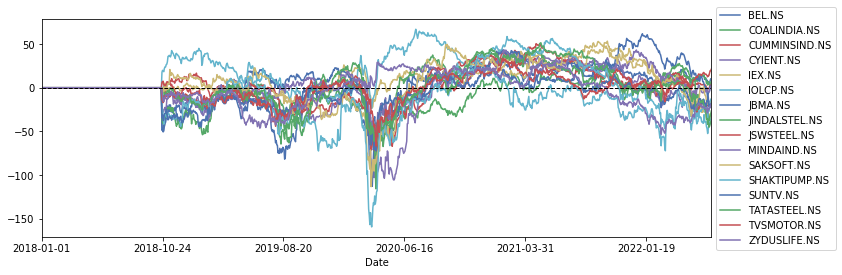

In [34]:
dma200 = optimization.DMA_200(df)
dma200.tail(10)

In [35]:
# Get weight from optimization 
# make percentage
W1 = pd.DataFrame([weights])
W = W1.iloc[0].to_numpy()*100
W

array([ 5.591,  8.677, 10.899,  8.922,  9.618,  4.588,  4.271,  1.911,
        4.621,  6.374,  4.57 ,  4.426,  4.875,  3.525,  7.821,  9.31 ])

In [36]:
#W = np.array([11.17,4.158,8.04,7.882,9.765,18.916,9.886,9.246,7.53,13.407])
#W = np.array([5.848,11.507,18.069,6.086,2.5,6.78,10.06,22.774,9.582,6.792])
CM = optimization.Variance(df,W)
CM

Portfolio Variance = [[0.13911869]]
Correlation between the Equities:


,BEL.NS,COALINDIA.NS,CUMMINSIND.NS,CYIENT.NS,IEX.NS,IOLCP.NS,JBMA.NS,JINDALSTEL.NS,JSWSTEEL.NS,MINDAIND.NS,SAKSOFT.NS,SHAKTIPUMP.NS,SUNTV.NS,TATASTEEL.NS,TVSMOTOR.NS,ZYDUSLIFE.NS
BEL.NS,0.998128,0.369439,0.287620,0.173638,0.215299,0.235604,0.267731,0.354443,0.328382,0.221423,0.245752,0.274941,0.310722,0.369948,0.281276,0.278971
COALINDIA.NS,0.369439,0.998247,0.238632,0.200646,0.254829,0.144879,0.227657,0.396541,0.399431,0.182806,0.204609,0.242688,0.327724,0.440492,0.252615,0.238230
CUMMINSIND.NS,0.287620,0.238632,0.998266,0.193170,0.206866,0.206025,0.210837,0.280045,0.263091,0.203092,0.184048,0.239747,0.297894,0.305378,0.286582,0.248653
CYIENT.NS,0.173638,0.200646,0.193170,0.998185,0.150764,0.163702,0.177977,0.214379,0.262450,0.200559,0.183743,0.193705,0.201913,0.228554,0.147290,0.078313
IEX.NS,0.215299,0.254829,0.206866,0.150764,0.998038,0.149900,0.182798,0.244497,0.239146,0.196885,0.189706,0.202031,0.243860,0.227163,0.141481,0.202321
IOLCP.NS,0.235604,0.144879,0.206025,0.163702,0.149900,0.998229,0.223000,0.210272,0.220078,0.177778,0.141432,0.264701,0.209017,0.193152,0.219390,0.237604
JBMA.NS,0.267731,0.227657,0.210837,0.177977,0.182798,0.223000,0.998211,0.282667,0.270765,0.233946,0.211156,0.305414,0.244090,0.265601,0.264465,0.195493
JINDALSTEL.NS,0.354443,0.396541,0.280045,0.214379,0.244497,0.210272,0.282667,0.998168,0.734256,0.256203,0.227482,0.277032,0.443739,0.757260,0.376039,0.320964
JSWSTEEL.NS,0.328382,0.399431,0.263091,0.262450,0.239146,0.220078,0.270765,0.734256,0.998195,0.271243,0.230626,0.275999,0.422166,0.751738,0.354130,0.272943
MINDAIND.NS,0.221423,0.182806,0.203092,0.200559,0.196885,0.177778,0.233946,0.256203,0.271243,0.998103,0.192076,0.240335,0.239023,0.244587,0.291503,0.157653


Standard Deviation of Portfolio = 1.526 %

Based on 1st STD (68% chances)
---------------------------------
Expected PF Return = 16.22 %
Annaul PF Variance  = 24.217 %
---------------------------------
Lower Bound Profit =  -7.997 %
Upper Bound Profit =  40.437 %
---------------------------------
Based on 2nd STD (95% chances)
---------------------------------
Annaul PF Variance  = 48.434 %
---------------------------------
Lower Bound Profit =  -32.214 %
Upper Bound Profit =  64.654 %
---------------------------------
Based on 3rd STD (99% chances)
---------------------------------
Annaul PF Variance  = 48.434 %
---------------------------------
Lower Bound Profit =  -56.431 %
Upper Bound Profit =  88.871 %


,Daily Avg. Rt %,Yearly Return %
BEL.NS,0.06,14.91
COALINDIA.NS,-0.01,-2.34
CUMMINSIND.NS,0.03,7.82
CYIENT.NS,0.06,14.62
IEX.NS,0.13,33.11
IOLCP.NS,0.19,47.26
JBMA.NS,0.12,29.78
JINDALSTEL.NS,0.11,26.86
JSWSTEEL.NS,0.10,25.76
MINDAIND.NS,0.11,27.54


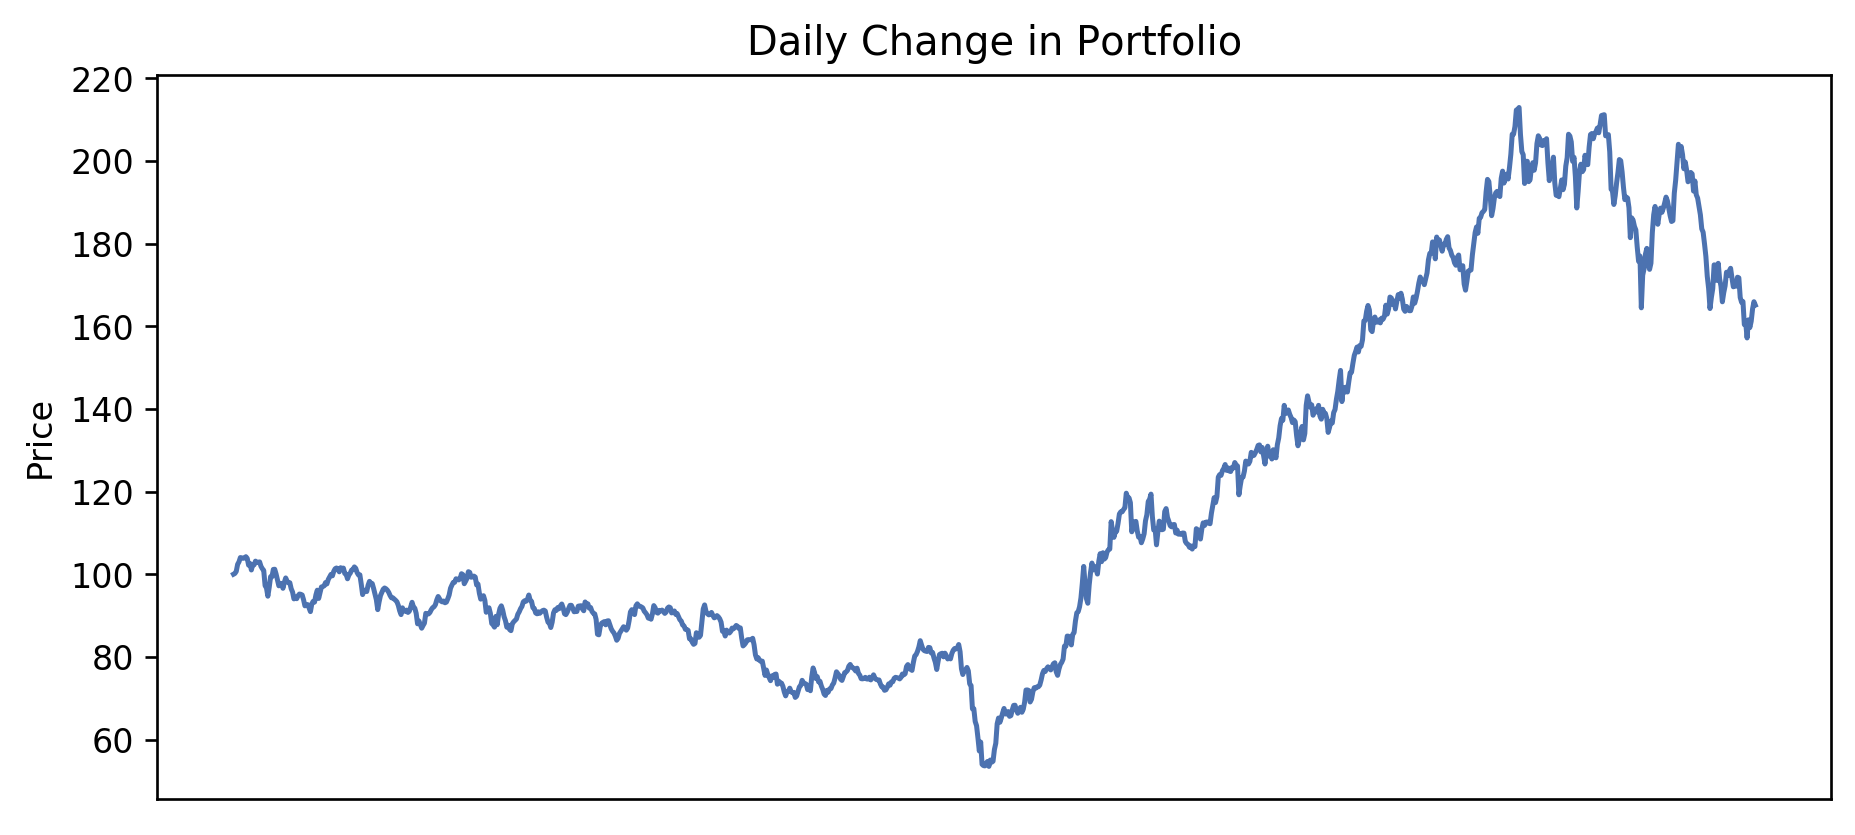

In [37]:
Capital, No_Days = 100, 252
ret = optimization.Portfolio_SD_Return(df,Capital,W,No_Days)
ret